In [1]:
from sqlalchemy import create_engine
import pandas as pd
import numpy as np

%matplotlib inline


In [2]:
rds_connection_string = "root:12345678@127.0.0.1/fires"
engine = create_engine(f'mysql+pymysql://{rds_connection_string}')


In [3]:
data = pd.read_sql("select * from fire_and_air_data", con=engine)
data.head()

/anaconda3/lib/python3.6/site-packages/pymysql/cursors.py:170: Warning: (3719, "'utf8' is currently an alias for the character set UTF8MB3, but will be an alias for UTF8MB4 in a future release. Please consider using UTF8MB4 in order to be unambiguous.")
  result = self._query(query)


,date,overall_aqi,site_name,year,fire_id,fire_name,discovery_date,containment_date,size,class,fire_year,distance
0,2001-01-01,153,San Francisco,2001,8659.0,LUCERNE,2001-01-01,2001-01-01,0.1,A,2001.0,380.928215
1,2001-01-01,153,San Francisco,2001,9387.0,DEBRIS 2,2001-01-01,2001-01-01,0.1,A,2001.0,136.804378
2,2001-01-01,153,San Francisco,2001,17163.0,LP HILL,2001-01-01,2001-01-01,0.1,A,2001.0,251.976491
3,2001-01-01,153,San Francisco,2001,30114.0,PGE 1,2001-01-01,2001-01-01,0.1,A,2001.0,200.715760
4,2001-01-01,153,San Francisco,2001,30201.0,PUMP HOUSE,2001-01-01,2001-01-01,0.1,A,2001.0,467.441792


In [4]:
year = pd.read_sql("select distinct fire_year from fire_and_air_data", con=engine)
year.head()

,fire_year
0,2001.0
1,NaN
2,2002.0
3,2003.0
4,2004.0


In [5]:
data = data[['date', 'overall_aqi', 'fire_id', 'size', 'distance']]

In [6]:
bins = [0, 50, 100, 150, 200, 250, 10000000000000000]

In [7]:
labels = ['within 50', 'within 100', 'within 150', 'within 200', 'within 250', 'bigger then 250']

In [8]:
data['bins'] = pd.cut(data['distance'], bins=bins, labels=labels)

In [9]:
data.head()

,date,overall_aqi,fire_id,size,distance,bins
0,2001-01-01,153,8659.0,0.1,380.928215,bigger then 250
1,2001-01-01,153,9387.0,0.1,136.804378,within 150
2,2001-01-01,153,17163.0,0.1,251.976491,bigger then 250
3,2001-01-01,153,30114.0,0.1,200.715760,within 250
4,2001-01-01,153,30201.0,0.1,467.441792,bigger then 250


In [10]:
bin_group = data.groupby(['bins','date'])

In [11]:
new_group = bin_group.mean().dropna()

In [12]:
# data.plot(x="distance", y="overall_aqi", kind="scatter")

In [ ]:
# data.plot.bar(x='bins', y='overall_aqi', rot=0)

In [13]:
new_group.head()

overall_aqi  fire_id  size   distance
bins      date                                             
within 50 2001-01-08         39.0  28494.0   0.1   2.119243
          2001-02-08         54.0  28495.0   0.1   3.026915
          2001-02-23         30.0  28496.0   0.1  26.894380
          2001-03-16         31.0  25192.0   5.0  38.783993
          2001-05-04         51.0  28497.0   0.1  11.737640

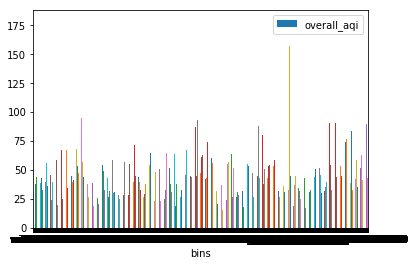

In [15]:
new_group.reset_index().plot.bar(x='bins', y='overall_aqi', rot=0)

In [ ]:
combined_group = data.groupby(['date','fire_id'])

In [ ]:
combined_group.head()

In [ ]:
# verify that there's never more then one record for a particular fire-id on a particular day
combined_group.size().max()

In [ ]:
grouped_by_date = data.groupby(['date'])

In [ ]:
grouped_by_date.describe().head()

In [ ]:
grouped_by_date.sum()

In [ ]:
acres_per_day_df = data.groupby('date')['size'].sum().to_frame().reset_index()

In [ ]:
acres_per_day_df.head()

In [ ]:
# Manually spot-check a date

data[data['date'] == '2014-01-03']

In [ ]:
air_data_df = pd.read_sql("select * from aqi_data", con=engine)
air_data_df.head()

In [ ]:
merged_data_df = pd.merge(air_data_df, acres_per_day_df, on='date')

In [ ]:
merged_data_df.head()

In [ ]:
merged_data_df.to_sql(name="acres_and_air_data", con=engine, if_exists="replace")